In [1]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.


'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.noise import AlphaDropout
from keras.utils import np_utils
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

historyMLP = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
scoreMLP = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scoreMLP[0])
print('Test accuracy:', scoreMLP[1])

Using TensorFlow backend.


60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [=======================

In [2]:
'''Trains a simple SELU based deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.


'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.noise import AlphaDropout
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam

batch_size = 128
num_classes = 10
epochs = 20
learning_rate = 0.001

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

modelSELU = Sequential()
modelSELU.add(Dense(512, activation='selu', input_shape=(784,)))
modelSELU.add(AlphaDropout(0.1))
modelSELU.add(Dense(512, activation='selu'))
modelSELU.add(AlphaDropout(0.1))
modelSELU.add(Dense(10, activation='softmax'))

modelSELU.summary()

modelSELU.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

historySELU = modelSELU.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
scoreSELU = modelSELU.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scoreSELU[0])
print('Test accuracy:', scoreSELU[1])

60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
alpha_dropout_1 (AlphaDropou (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
alpha_dropout_2 (AlphaDropou (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [=======================

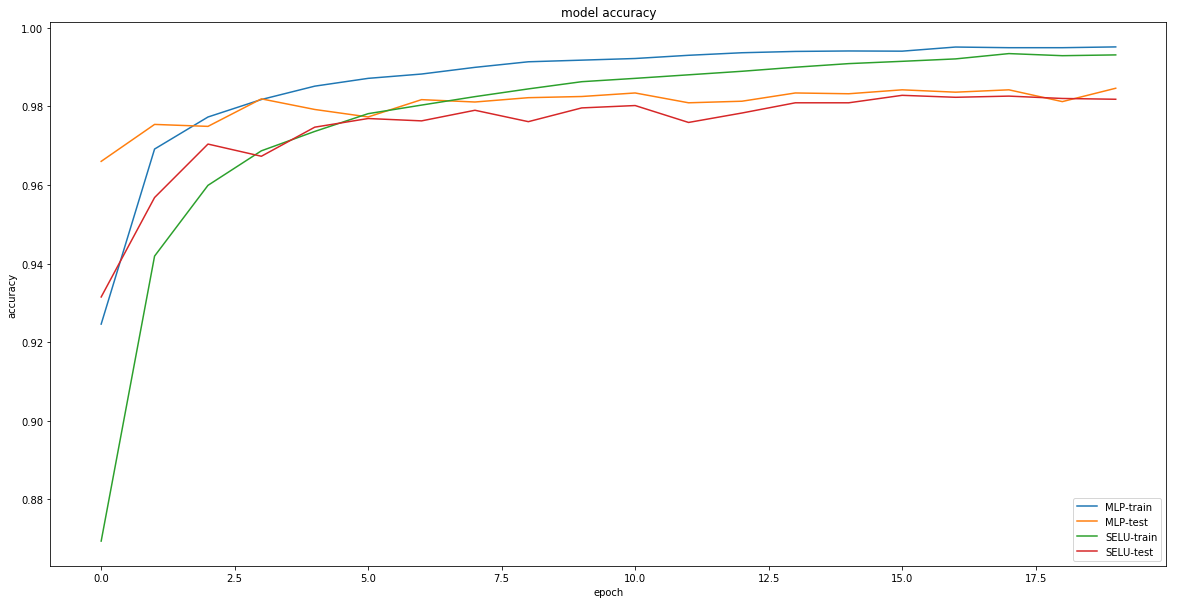

In [3]:
import matplotlib.pyplot as plt
import pylab

plt.figure(figsize=(20,10))
plt.plot(historyMLP.history['acc'])
plt.plot(historyMLP.history['val_acc'])
plt.plot(historySELU.history['acc'])
plt.plot(historySELU.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['MLP-train', 'MLP-test','SELU-train', 'SELU-test'], loc='lower right')
plt.show()

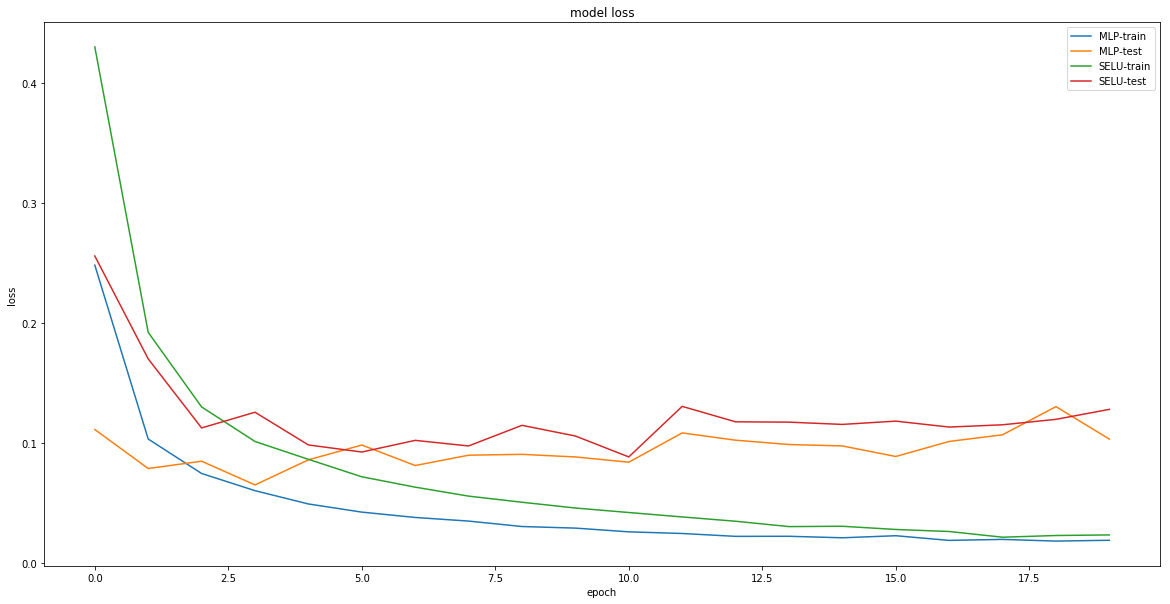

In [4]:
plt.figure(figsize=(20,10))
plt.plot(historyMLP.history['loss'])
plt.plot(historyMLP.history['val_loss'])
plt.plot(historySELU.history['loss'])
plt.plot(historySELU.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['MLP-train', 'MLP-test', 'SELU-train', 'SELU-test'], loc='upper right')
plt.show()

In [5]:
# SELU implementation from https://github.com/bioinf-jku/SNNs/blob/master/selu.py
import tensorflow as tf
import random
# import matplotlib.pyplot as plt
# -*- coding: utf-8 -*-
'''
Tensorflow Implementation of the Scaled ELU function and Dropout
'''

import numbers
from tensorflow.contrib import layers
from tensorflow.python.framework import ops
from tensorflow.python.framework import tensor_shape
from tensorflow.python.framework import tensor_util
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import random_ops
from tensorflow.python.ops import array_ops
from tensorflow.python.layers import utils

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

def selu(x):
    with ops.name_scope('elu') as scope:
        alpha = 1.6732632423543772848170429916717
        scale = 1.0507009873554804934193349852946
        return scale*tf.where(x>=0.0, x, alpha*tf.nn.elu(x))


def dropout_selu(x, keep_prob, alpha= -1.7580993408473766, fixedPointMean=0.0, fixedPointVar=1.0,
                 noise_shape=None, seed=None, name=None, training=False):
    """Dropout to a value with rescaling."""

    def dropout_selu_impl(x, rate, alpha, noise_shape, seed, name):
        keep_prob = 1.0 - rate
        x = ops.convert_to_tensor(x, name="x")
        if isinstance(keep_prob, numbers.Real) and not 0 < keep_prob <= 1:
            raise ValueError("keep_prob must be a scalar tensor or a float in the "
                                             "range (0, 1], got %g" % keep_prob)
        keep_prob = ops.convert_to_tensor(keep_prob, dtype=x.dtype, name="keep_prob")
        keep_prob.get_shape().assert_is_compatible_with(tensor_shape.scalar())

        alpha = ops.convert_to_tensor(alpha, dtype=x.dtype, name="alpha")
        keep_prob.get_shape().assert_is_compatible_with(tensor_shape.scalar())

        if tensor_util.constant_value(keep_prob) == 1:
            return x

        noise_shape = noise_shape if noise_shape is not None else array_ops.shape(x)
        random_tensor = keep_prob
        random_tensor += random_ops.random_uniform(noise_shape, seed=seed, dtype=x.dtype)
        binary_tensor = math_ops.floor(random_tensor)
        ret = x * binary_tensor + alpha * (1-binary_tensor)

        a = tf.sqrt(fixedPointVar / (keep_prob *((1-keep_prob) * tf.pow(alpha-fixedPointMean,2) + fixedPointVar)))

        b = fixedPointMean - a * (keep_prob * fixedPointMean + (1 - keep_prob) * alpha)
        ret = a * ret + b
        ret.set_shape(x.get_shape())
        return ret

    with ops.name_scope(name, "dropout", [x]) as name:
        return utils.smart_cond(training,
                                lambda: dropout_selu_impl(x, keep_prob, alpha, noise_shape, seed, name),
                                lambda: array_ops.identity(x))

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 50
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = selu(tf.matmul(X, W1) + b1)
L1 = dropout_selu(L1, keep_prob=keep_prob)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = selu(tf.matmul(L1, W2) + b2)
L2 = dropout_selu(L2, keep_prob=keep_prob)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = selu(tf.matmul(L2, W3) + b3)
L3 = dropout_selu(L3, keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = selu(tf.matmul(L3, W4) + b4)
L4 = dropout_selu(L4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 0.520059154
Epoch: 0002 cost = 0.161047111
Epoch: 0003 cost = 0.132361550
Epoch: 0004 cost = 0.106143619
Epoch: 0005 cost = 0.096453789
Epoch: 0006 cost = 0.096108608
Epoch: 0007 cost = 0.081616417
Epoch: 0008 cost = 0.076672313
Epoch: 0009 cost = 0.080843923
Epoch: 0010 cost = 0.073859843
Epoch: 0011 cost = 0.061821199
Epoch: 0012 cost = 0.064553186
Epoch: 0013 cost = 0.061651825
Epoch: 0014 cost = 0.049234065
Epoch: 0015 cost = 0.051621947
Epoch: 0016 cost = 0.053794841
Epoch: 0017 cost = 0.049004902
Epoch: 0018 cost = 0.045878440
Epoch: 0019 cost = 0.043574250
Epoch: 0020 cost = 0.054216822
Epoch: 0021 cost = 0.036742025
Epoch: 0022 cost = 0.039176778
Epoch: 0023 cost = 0.040113735
Epoch: 0024 cost = 0.040813351
Epoch: 0025 cost = 0.032637658
Epoch: 0026 cost = 0.081223909
